In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
import rpy2

In [3]:
# Set seed
np.random.seed(666)

# Periods
p = 11

# Subpopulation sides 
s = 1000

# Exponentional growth
e = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = np.exp(j) * np.random.uniform(1, 1)
        e.append([i, j, r, 'e'])
        
        
e = pd.DataFrame(e, columns=['i', 'j', 'r', 'g'])


In [4]:
# Inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100

u =[]

for i in range(s):
    for j in np.arange(1, p, 1.5):
        r = (b1 * j + b2 * j ** 2) * np.random.uniform(0.5, 1)
        u.append([i, j, r, 'u'])

        
u = pd.DataFrame(u, columns=['i', 'j', 'r', 'g'])

In [5]:
# Log shape
b = 2000

l = []

for i in range(s):
    for j in np.arange(12, p, 1):
        r = b * np.log(j) * np.random.uniform(12, 1.5)
        l.append([i, j, r, 'l'])


l = pd.DataFrame(l, columns=['i', 'j', 'r', 'g'])


# Append data
df = pd.concat([e, u, l], axis=0, )

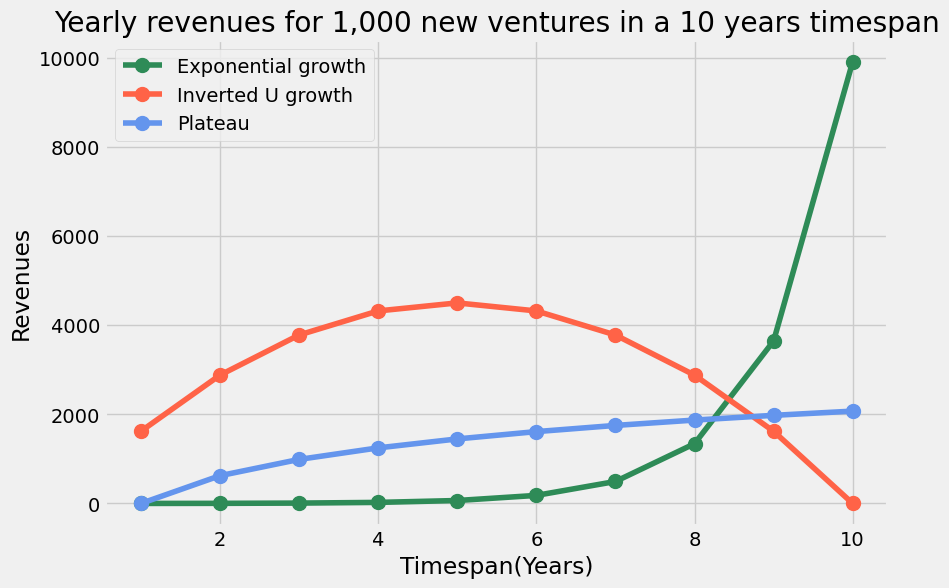

In [6]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add data 
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

y_e = [0.45 * np.exp(i) for i in np.arange(1, 11, 1)]
ax.plot(x, y_e, color='seagreen', alpha=1, marker='o', markersize=10, label='Exponential growth')
    
y_u = [0.45 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax.plot(x, y_u, color='tomato', alpha=1, marker='o', markersize=10, label='Inverted U growth')

y_l = [0.45 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax.plot(x, y_l, color='cornflowerblue', alpha=1, marker='o', markersize=10, label='Plateau')


# legend
ax.legend(loc='best')

# title
ax.set_title('Yearly revenues for 1,000 new ventures in a 10 years timespan')

# axes
ax.set_xlabel('Timespan(Years)')
ax.set_ylabel('Revenues')
        
# show plot
plt.show()